In [67]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [132]:
data=pd.read_csv('blackFriday_train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [133]:
#printing shape of dataset
data.shape

(550068, 12)

In [134]:
#checking for null values in dataset

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

- It can be seen that 2 columns have null values present.

In [135]:
#printing count for USER_ID column
data['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [136]:
#printing count for Product_ID column
data['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [137]:
#printing column names

data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [138]:
# checking for unique values in Gender column

data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [139]:
# checking for unique values in Age column

data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [140]:
# checking for unique values in Occupation column

data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [141]:
# checking for unique values in Stay_In_Current_City_Years  column

data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [142]:
# checking for unique values in Gender column

data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [143]:
# checking for unique values in Marital_Status column

data['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [144]:
# checking for unique values in Product_Category_1 column

data['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [145]:
# checking for unique values in Purchase column

data['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

# Checking for duplicates in dataset

In [146]:
data.duplicated().sum()

0

- There are no duplicates seen in dataset

In [147]:
# checking for unique values in Purchase column

data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [148]:
#printing count for Product_Category_3 column

data['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [149]:
# checking for unique values in Purchase column

data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [150]:
#printing count for Product_Category_2 column

data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [151]:
# filling the nan values with median values.

data['Product_Category_2'].fillna(data['Product_Category_2'].median(),inplace=True)

In [152]:
# checking if nan are filled or not by printing unique values for column

data['Product_Category_2'].unique()

array([ 9.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12., 10.,
       17., 13.,  7., 18.])

In [154]:
# filling nan values for column with median values

data['Product_Category_3'].fillna(data['Product_Category_3'].median(),inplace=True)

In [155]:
# checking if nan are filled or not by printing unique values for column

data['Product_Category_3'].unique()

array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

- All nan values have been removed.

In [157]:
# printing dataset after treating nan values in columns

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969


- Since userID and productID are unique IDs for products and users, hence they are irrelevant to model building. Hence dropping both the columns.

In [158]:
#dropping unwanted columns

data.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [159]:
# dataset shape after dropping 2 columns
data.shape

(550068, 10)

In [160]:
#printing dataset

data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969


# EDA

# COUNTPLOTS

<AxesSubplot:xlabel='Gender', ylabel='count'>

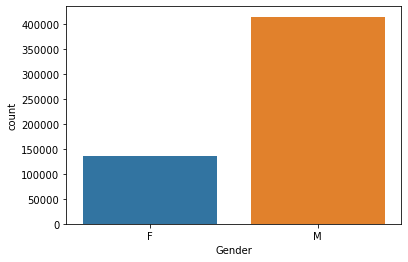

In [161]:
sns.countplot(data['Gender'])

- Most number of customers are male while less than half of customers are female.

<AxesSubplot:xlabel='Age', ylabel='count'>

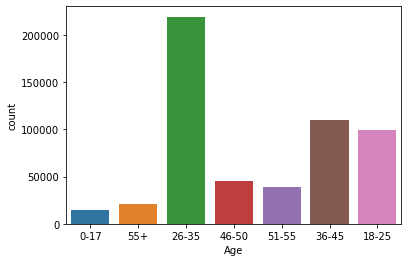

In [162]:
sns.countplot(data['Age'])

- The persons in age group of 26-35 are more compared to other age groups that participated in black friday sale.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

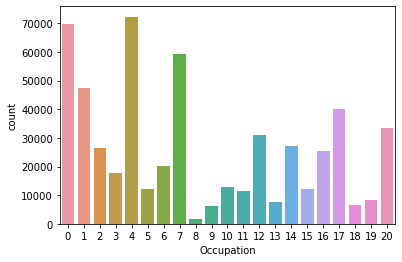

In [163]:
sns.countplot(data['Occupation'])

- The persons having occupation of value 0,4 and 7 are more compared to other occupations that participated in black friday sale.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

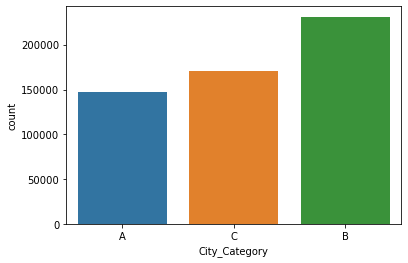

In [164]:
sns.countplot(data['City_Category'])

- The customers staying in B city category are more compared to other city groups that participated in black friday sale.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

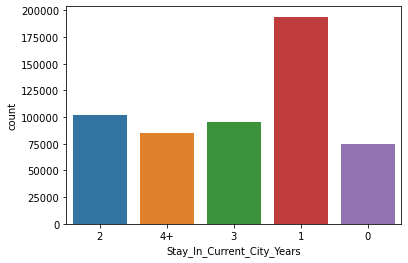

In [165]:
sns.countplot(data['Stay_In_Current_City_Years'])

- Customers who are staying in current city for past 1 year are more compared to other persons that participated in black friday sale.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

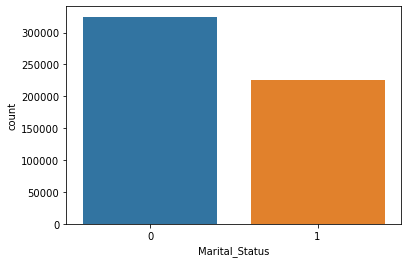

In [166]:
sns.countplot(data['Marital_Status'])

- Most number of unmarried customers attended black friday sale.

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

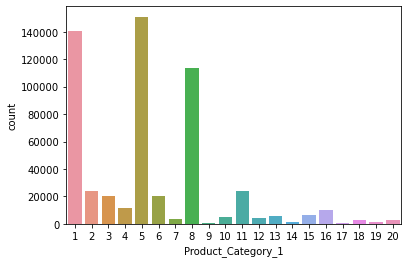

In [167]:
sns.countplot(data['Product_Category_1'])

- In Product category 1, 1,5 and 8 categorized products were in large numbers compared to other products during black friday sale.

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

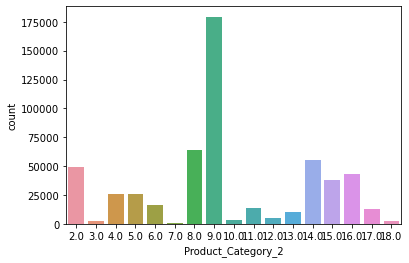

In [168]:
sns.countplot(data['Product_Category_2'])

In Product category 2, 2,8 and 014 categorized products were in large numbers compared to other products during black friday sale.

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

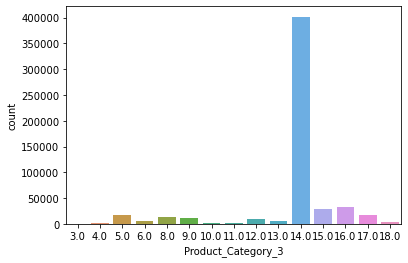

In [169]:
sns.countplot(data['Product_Category_3'])

In Product category 3, 014 categorized products were in large numbers compared to other products during black friday sale.

# BARPLOTS

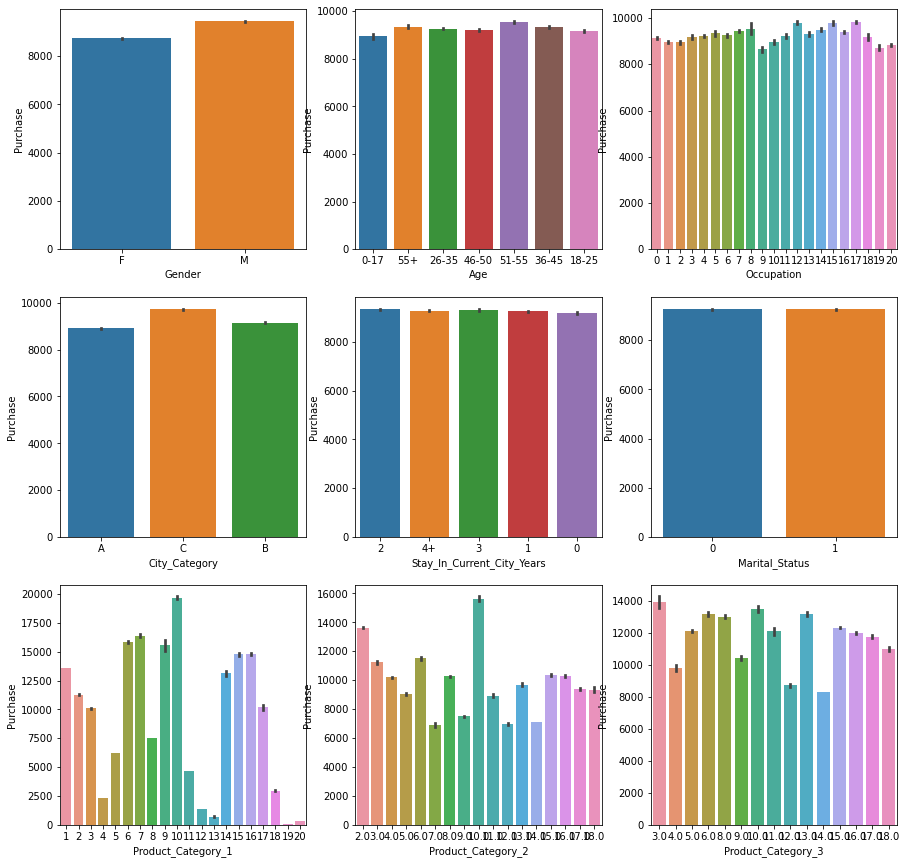

In [170]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.barplot(x=data[column],y=data['Purchase'])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Observations for above barplots:
    - The males purchased more products then females during black friday sale.
    - Purchases for 0-17 age group were slightly lower compared to other age groups.Purchases are highest for 51-55 age           group people.
    - Customers having occupation of 12, 15 and 17 purchased more compared to people from other occupations.
    - The persons from city category c have purchased more items for black froday then A and B category.
    - Almost equal number of purchases has been seen for people staying in current city for black friday sale.
    - Equal number of purchases has been seen in married as well as unmarried people for black friday sale.
    - In product category 1, products with masked code of 10 have purchased highest by people.
    - In product category 2, products with masked code of 10 have purchased highest by people comapred to other products.
    - In product category 3, products with masked code of 3 and 10 have purchased highest by people.

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


# LINEPLOTS

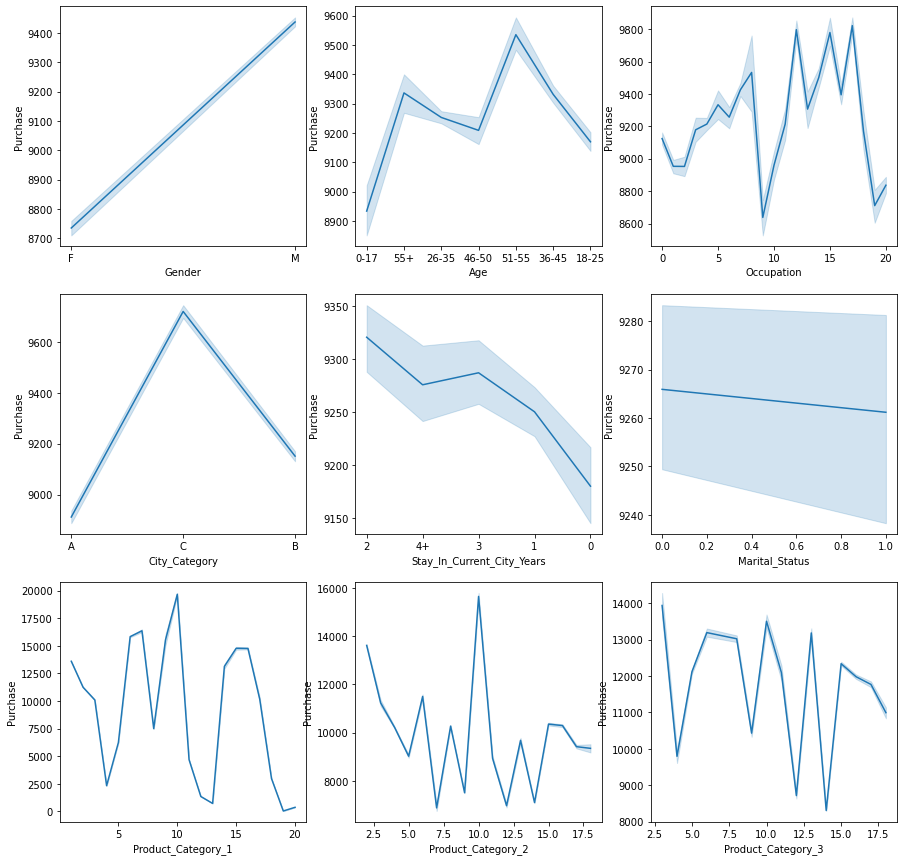

In [172]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.lineplot(x=data[column],y=data['Purchase'])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- The observations for line plots are same as bar plots.These plots are plotted to show another way representing feature columns with respect to target columns.

# Encoding the data using Label Encoder

In [173]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [174]:
#transforming the data
df1=label_enc.fit_transform(data['Gender'])
df2=label_enc.fit_transform(data['Age'])
df3=label_enc.fit_transform(data['City_Category'])
df4=label_enc.fit_transform(data['Stay_In_Current_City_Years'])

In [175]:
data['Gender']=df1
data['Age']=df2
data['City_Category']=df3
data['Stay_In_Current_City_Years']=df4

In [176]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,9.0,14.0,1422
3,0,0,10,0,2,0,12,14.0,14.0,1057
4,1,6,16,2,4,0,8,9.0,14.0,7969


In [177]:
data.shape

(550068, 10)

In [178]:
# describing the dataset

data.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,2.496430,8.076707,1.042640,1.858418,0.409653,5.404270,9.576434,13.596114,9263.968713
std,0.431205,1.353632,6.522660,0.760211,1.289443,0.491770,3.936211,4.226025,2.352863,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5823.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,14.000000,12054.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# Plotting the correlation matrix to check for correlation

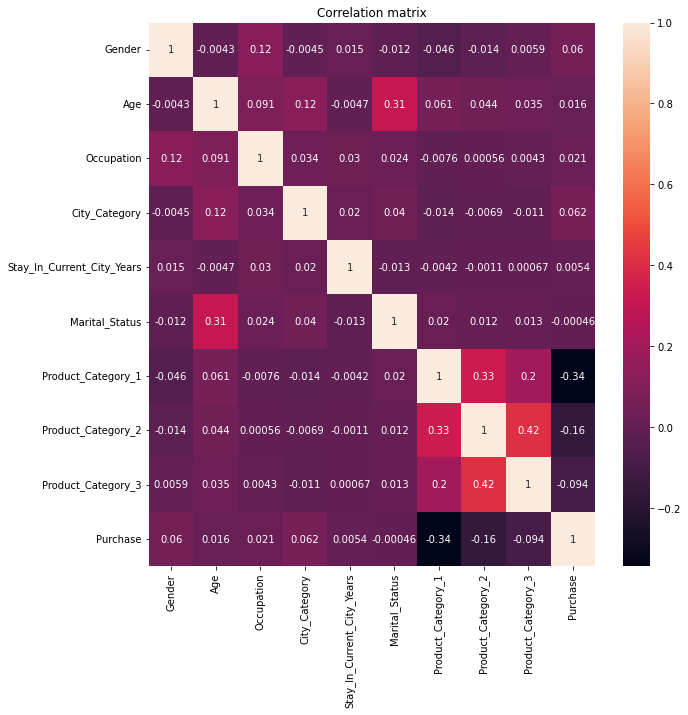

In [179]:
#plotting heatmap

plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- No features are multicorrelated in this dataset as shows above.

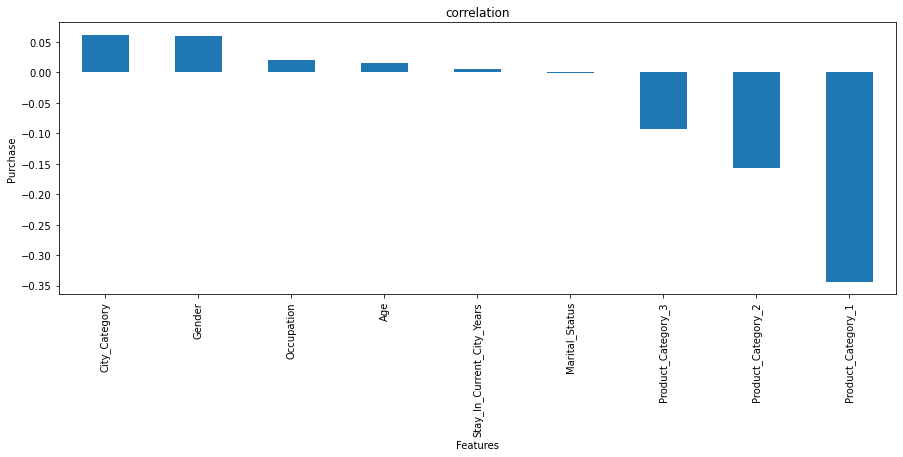

In [180]:
#plotting a coorelation plot that will show relation of features with label(price)

plt.figure(figsize=(15,5))
data.corr()['Purchase'].sort_values(ascending=False).drop(['Purchase']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Purchase')
plt.title('correlation')
plt.show()

- Product category 1 column is highest negatively related to label while city category column is highest positively related to label column.

# Checking for outliers in dataset

In [181]:
features=['Product_Category_1','Product_Category_2','Product_Category_3']

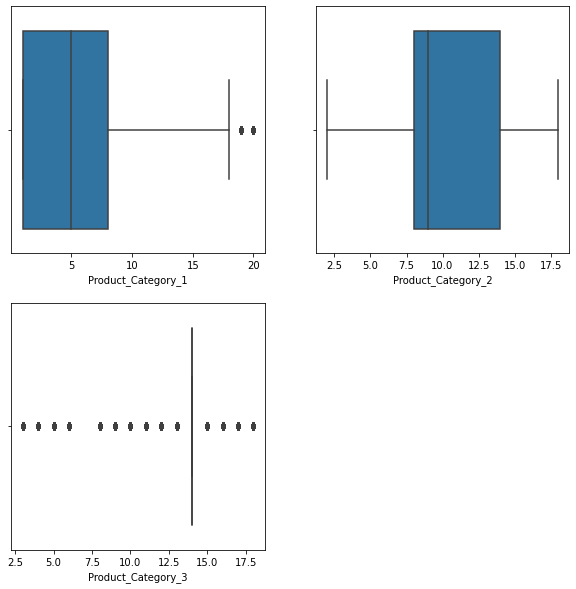

In [182]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in features:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- It can be seen from above plots that product category 1 and 3 columns have outliers present, which needs to be treated.

# Outliers will be treated using zscore method.

In [183]:
#importing z score library

from scipy.stats import zscore

In [184]:
z_score=zscore(data[['Product_Category_1','Product_Category_3']])

In [185]:
abs_z_score=np.abs(z_score)

In [186]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [187]:
data=data[filtering_entry]

In [188]:
data.shape

(518754, 10)

# Data loss after removing outliers

In [189]:
# data loss percentage 
data_loss=((550068-518754)/518754)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 6.036387189303601%


# Checking for skewness in dataset

In [190]:
data[features].skew()

Product_Category_1    0.724988
Product_Category_2   -0.038615
Product_Category_3   -1.789103
dtype: float64

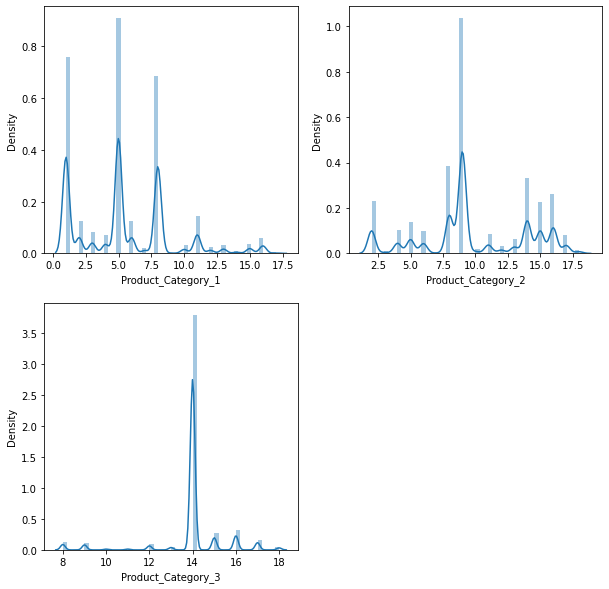

In [191]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in features:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

 - It can be seen from above plots that product category 1 and 3 columns have skewness present, which needs to be treated.
# Removing skewness using power transformation method.    

In [129]:

#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [ ]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [ ]:
data[features.skew()